# Question 1

In [ ]:
import yfinance as yahooFinance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
ticker = yahooFinance.Ticker("AAPL")

def clean_data(data):
    data = data.drop('Dividends',axis =1)
    data = data.drop('Stock Splits',axis =1)
    data = data.drop('Volume',axis =1)
    return data

Get_data - extracts the data from yahoo finance and removed the unnecessary columns.

In [ ]:
def get_data(period):
    history_stock = ticker.history(period=period)
    return history_stock

Split_data – we introduce a variable y which is assigned to the closing price which we are trying to predict. We use a test size of 10/shape of data to find what percentage of the total available data 10 days is.

In [ ]:
def split_data(X,Y):
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle = False, random_state = 10123)
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return x_train,x_test,y_train,y_test

 Defining the normal equation and gradient descent functions and use the get_data function to get the last 2 years of Apple stock price data to train the model. We try five different values of alpha and calculate the mean squared error to determine which one fits the data best. We plotted the data and the results are as below.

In [ ]:
def normal_equation(x, y, alpha=0):
    x_transpose = np.transpose(x)
    identity = np.identity(x.shape[1])
    theta = np.linalg.inv(x_transpose.dot(x) + alpha * identity).dot(x_transpose).dot(y)
    return thetas

In [ ]:
def gradient_descent(x, y, alpha, learning_rate, num_iterations):

    m, n = x.shape
    x_transpose = np.transpose(x)
    identity = np.identity(x.shape[1])
    theta = np.linalg.inv(x_transpose.dot(x) + alpha * identity).dot(x_transpose).dot(y)
    for i in range(num_iterations):
        # Compute the predictions and the gradient
        y_pred = np.dot(x, theta)
        gradient = (1 / m) * np.dot(x.T, (y_pred - y))
        theta = theta - learning_rate * gradient

    return theta

In [ ]:
def data(df):
    i = 0
    X = []
    Y = []
    while True:
        try:
          # use last 10 days
            x = df.iloc[i:i+10]["Close"]
            # predict 11th day price
            y = df.iloc[i+11]["Close"]
            X.append(x)
            Y.append(y)
            # iterate
            i+=1
        except:
            break
    return X,Y

In [ ]:
AAPL_data = get_data("2y")
X,Y = data(AAPL_data)
x_train,x_test,y_train,y_test = split_data(X,Y)

In [ ]:
alpha_values = [0.00001,0.0001,0.001, 0.01, 0.1]  # Experiment with different alpha values
learning_rate = 0.0001
num_iterations = 5

print("Answer with Normal Equation")
#Normal equation model
for alpha in alpha_values:
    # Train the model using the normal equation
    theta = normal_equation(x_train, y_train, alpha=alpha)

    # Make predictions on the test set
    y_pred = x_test.dot(theta)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    print(f"Alpha = {alpha}, MSE = {mse}")

print("Answer with GD Method")
# Gradient descent model
for alpha in alpha_values:
    # Train the model using gradient descent
    theta = gradient_descent(x_train, y_train, alpha, learning_rate, num_iterations)

    # Make predictions on the test set
    y_pred2 = x_test.dot(theta)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred2)

    print(f"Alpha = {alpha}, MSE = {mse}")

Answer with Normal Equation
Alpha = 1e-05, MSE = 11.839230652628585
Alpha = 0.0001, MSE = 11.839230667584566
Alpha = 0.001, MSE = 11.839230818184374
Alpha = 0.01, MSE = 11.839232325337901
Alpha = 0.1, MSE = 11.839247398009928
Answer with GD Method
Alpha = 1e-05, MSE = 11.838361468676561
Alpha = 0.0001, MSE = 11.838373579855887
Alpha = 0.001, MSE = 11.83195978874422
Alpha = 0.01, MSE = 11.777084568213178
Alpha = 0.1, MSE = 12.674706880753439


Tried five different values of alpha and compared their mean squared error values to determine which alpha to use. From the results, we should use the smaller values of alpha, which make intuitive sense since the smaller the learning rate, the higher the chance we converge to the minimum value.

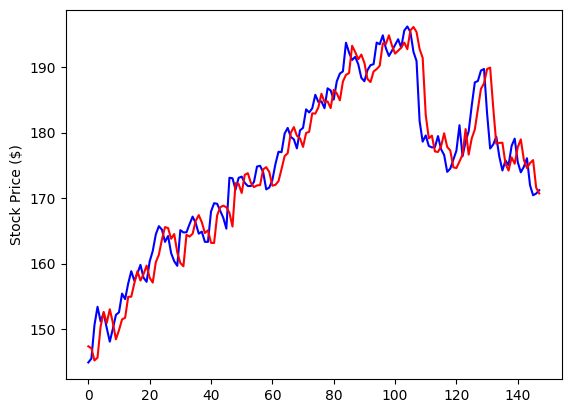

In [ ]:
# Normal Equation
theta = normal_equation(x_train, y_train, alpha=0.0001)

# Predictions on the test set
y_pred = x_test.dot(theta)
plt.plot(y_test,color ='blue')
plt.plot(y_pred,color='red')
plt.ylabel("Stock Price ($)")
plt.show()

Plot of the normal equation and the predictions of the test set follow similar patterns and may show signs of overfitting.

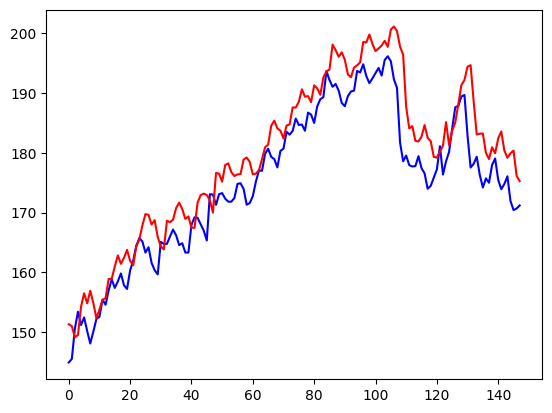

In [ ]:
learning_rate = 0.0002
num_iterations = 5
theta = gradient_descent(x_train, y_train, 0.01, learning_rate, num_iterations)

# Make predictions on the test set
y_pred2 = x_test.dot(theta)
plt.plot(y_test,color ='blue')
plt.plot(y_pred2,color='red')
plt.show()

## Question 2

2. Predict whether the next closing price will be higher than 2% of the previous closing price (Logistic Regression).
– Python is preferred.
– Use 1 year or two years’ data as the training set.
– See how your answers evolve as you play with different values of α and criterion for determining convergence.
– Plot your model performance together with real data for 6 months for your choice of α.
Remarks

* You may use Yahoo Finance or Bloomberg Terminals to obtain the data.
* You can pick any stock/index.
* Choose most recent 6 month data for testing purpose and the data before that as training
data.
* See page 39 of the Textbook 1 for more information.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def fetch_stock_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

Below is the preprocessing step which adds "PriceIncrease" column - binary indicator of whether the closing price increased by more than 2% from the current day to the next day.

In [ ]:

def preprocess_data(data):
    # Adding PriceIncrease here is a binary indicator of whether the closing price increased by more than 2% from the current day to the next day.
    data['PriceIncrease'] = (data['Close'].shift(-1) / data['Close']) > 1.02

    value_counts = data['PriceIncrease'].value_counts()
    data.dropna(inplace=True)
    X = data[['Open', 'High', 'Low', 'Volume']].values
    y = data['PriceIncrease'].astype(int).values
    return X, y

Below is the sigmoid function to scale the value to 0 or 1

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Below is the class for losgistic regression, fit uses gradient descent to fit the model

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, convergence_threshold=1e-4):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.convergence_threshold = convergence_threshold

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n + 1)
        X = np.column_stack((np.ones(m), X))

        prev_cost = float('inf')

        for iteration in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

            # Calculating the cost
            cost = -(np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / m)

            #Check for convergence
            if abs(prev_cost - cost) < self.convergence_threshold:
                break

            prev_cost = cost

    def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X))
        predictions = sigmoid(np.dot(X, self.theta))
        return (predictions >= 0.5).astype(int)

We will take apple stock for this task, and 2 years data for training and 6 months data for testing as asked

In [ ]:
symbol = 'AAPL'
start_date_train = '2021-03-30'
end_date_train = '2023-03-30'
start_date_test = '2023-04-01'
end_date_test = '2023-10-01'

In [ ]:
train_data = fetch_stock_data(symbol, start_date_train, end_date_train)
test_data = fetch_stock_data(symbol, start_date_test, end_date_test)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

We predict y values using different learning rates here and output the confusion matrix, we notice that precision,recall and F1 scores are zero as the y_test has only 6 positive outcome

In [ ]:
learning_rates = [0.01, 0.1, 0.01, 1.0]
accuracies = []

for alpha in learning_rates:
    model = LogisticRegression(learning_rate=alpha, num_iterations=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_pred == y_test)
    accuracies.append(accuracy)

    # Adding confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    #  Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Confusion Matrix:")
    print(conf_matrix)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')

Confusion Matrix:
[[119   0]
 [  6   0]]
Accuracy: 95.20%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%
Confusion Matrix:
[[119   0]
 [  6   0]]
Accuracy: 95.20%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%
Confusion Matrix:
[[119   0]
 [  6   0]]
Accuracy: 95.20%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%
Confusion Matrix:
[[119   0]
 [  6   0]]
Accuracy: 95.20%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%


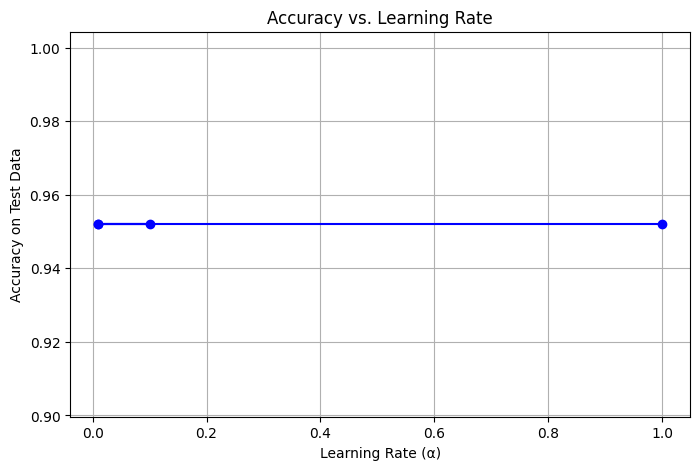

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate (α)')
plt.ylabel('Accuracy on Test Data')
plt.title('Accuracy vs. Learning Rate')
plt.grid(True)
plt.show()

In [ ]:
print(f'Accuracy on test data: {accuracy * 100:.2f}%')


Accuracy on test data: 95.20%


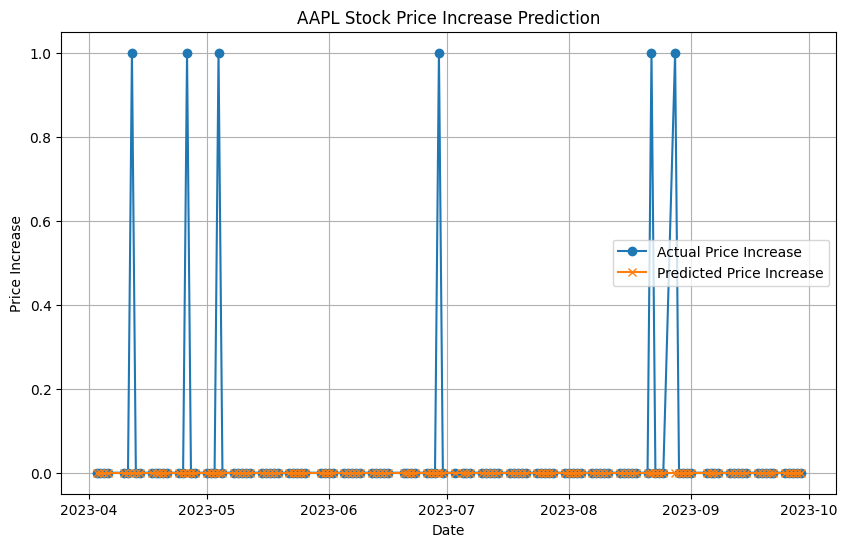

In [ ]:
date_index = np.array(test_data.index)
plt.figure(figsize=(10, 6))
plt.plot(date_index, y_test, label='Actual Price Increase', marker='o')
plt.plot(date_index, y_pred, label='Predicted Price Increase', marker='x')
plt.xlabel('Date')
plt.ylabel('Price Increase')
plt.title(f'{symbol} Stock Price Increase Prediction')
plt.legend()
plt.grid(True)
plt.show()

